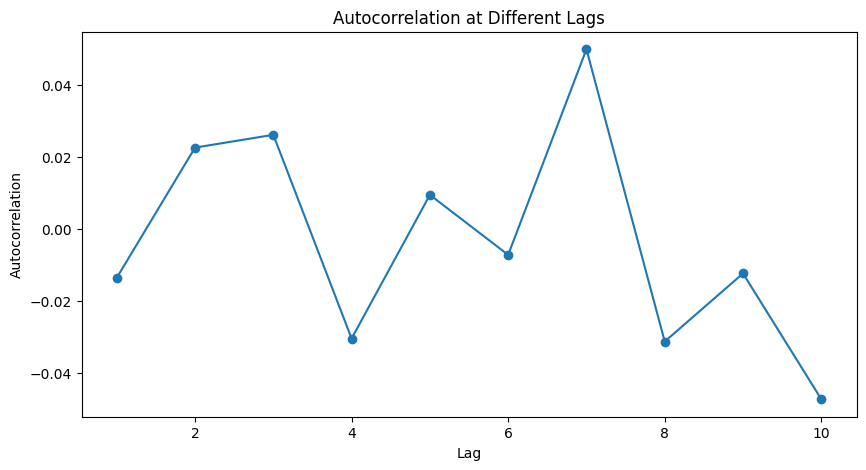

Best lag for momentum: 7
Autocorrelation at the best lag: 0.049929184123367124
No significant momentum. Autocorrelation: 0.049929184123367124


In [3]:
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


symbol = 'BTC/USDT'  # Choose the trading pair you want to analyze

# Initialize the Binance exchange object
exchange = ccxt.binance()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data
ohlcv = exchange.fetch_ohlcv(symbol, '1d')  # Fetch daily data, you can adjust the timeframe

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# Calculate daily returns
df['returns'] = df['close'].pct_change()

# Calculate autocorrelation for different lags
max_lag = 10  # You can adjust this based on your analysis
autocorrelations = [df['returns'].autocorr(lag=lag) for lag in range(1, max_lag + 1)]

# Find the lag with the highest positive autocorrelation
best_lag = np.argmax(autocorrelations) + 1  # Adding 1 to convert from 0-indexed to 1-indexed
best_autocorrelation = autocorrelations[best_lag - 1]

# Plot the autocorrelation values
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_lag + 1), autocorrelations, marker='o')
plt.title('Autocorrelation at Different Lags')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Print the results
print(f'Best lag for momentum: {best_lag}')
print(f'Autocorrelation at the best lag: {best_autocorrelation}')

# Implement your momentum strategy based on the best lag
threshold = 0.2  # Define a threshold for the autocorrelation
if best_autocorrelation > threshold:
    print(f'Momentum detected. Autocorrelation: {best_autocorrelation}')
    # Implement your buy or sell logic here
else:
    print(f'No significant momentum. Autocorrelation: {best_autocorrelation}')